In [1]:
import os
import torch
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
from skimage import color
from skimage import io, transform
import cv2

import torch
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable
import torch.nn.functional as nnfun

from deep.datasets import imageutl as imutl
from deep.datasets import utility as utl
from deep.datasets import weightmaps 

from deep import netmodels as nnmodels
from deep import visualization as view
from deep import netutility as nutl
from deep import neuralnet as deepnet
from deep import postprocessing as posp
from deep import processing as proc

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
def imageshowlist(image_in, image_out ):    
    plt.figure( figsize=(16,16))
    plt.subplot(121)
    plt.imshow( image_in )
    plt.title('Image input')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow( image_out )
    plt.title('Image output')
    plt.axis('off')
    plt.show()

def imageshow( image, title='image'):
    plt.figure( figsize=(8,8))
    plt.imshow( image )
    plt.axis('off')
    plt.show()

In [3]:
# configuration
PATHDATASET = '../db'
NAMEDATASET = 'databoewl'
METADATA = 'stage1_train_labels.csv'
PATHMODEL = 'netruns/experiment_unet_fx_c0001'
NAMEMODEL = 'chk000135.pth.tar'
RLNAME = 'test_masks.csv'
NUMITER = 5
PATHNAMEDATASET = os.path.join(PATHDATASET, NAMEDATASET);
PATHNAMEDMETADATA = os.path.join(PATHDATASET, NAMEDATASET, METADATA)
PATHNAMEMODEL = os.path.join(PATHMODEL, NAMEMODEL)

In [4]:
pathdataset     = '../db'
namedataset     = 'datacaltech'
sub_folder      =  ''
folders_images  = 'images'
folders_labels  = 'labels'

pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.ctechProvide.create(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    )

print(len(dataloader))
print(':)!!!')

29
:)!!!


In [6]:
segment = proc.Net(  )
segment.loadmodel( PATHNAMEMODEL )

>> Model loader ready ...


3 171 (512, 512, 3)


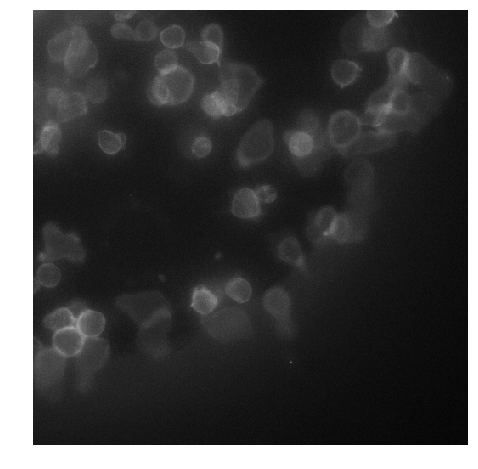

In [7]:
i=7 
image, label = dataloader[ i ]
#image = scipy.misc.imresize(image, 0.25, interp='bilinear', mode='RGB')

ini=500
image = image[ini:ini+512, ini:ini+512,:]


nutl.summary(image)
imageshow(image)


>>
>>
>>
>>
DONE!!


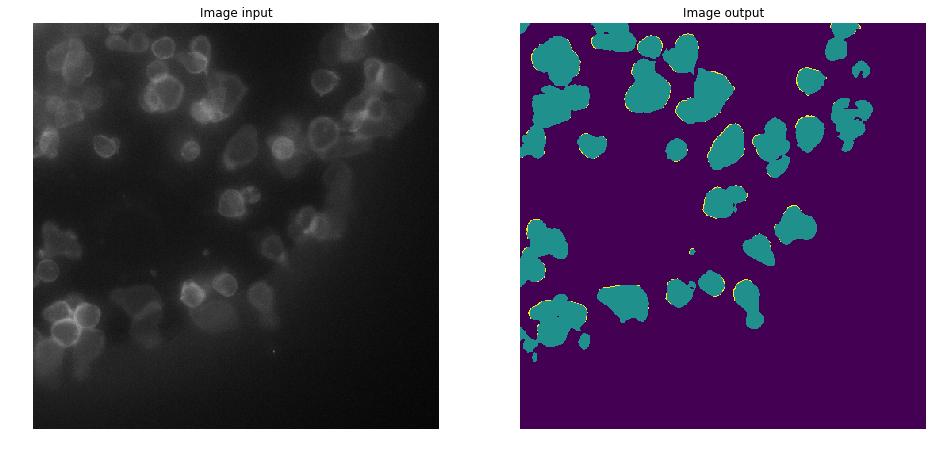

In [8]:
score = segment(image)
predition = np.argmax(score, axis=2).astype('uint8') 

print('DONE!!')
imageshowlist(image, predition)

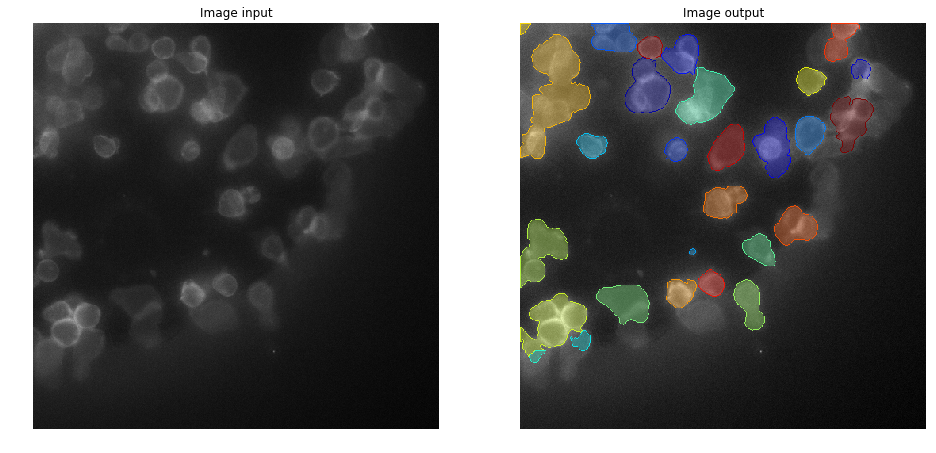

In [9]:
score_prob = nutl.sigmoid(score)

#m,c = score_prob[:,:,1], score_prob[:,:,2]
#labels_est = posp.postprocess(m,c)
labels_est = posp.mpostprocess(score)
labels_mask_est = np.transpose( labels_est, (1,2,0) )

#labels_mask_est = np.transpose( posp.decompose(labels_est), (1,2,0) )

labels_mask_est = labels_mask_est[:,:, np.random.permutation(labels_mask_est.shape[2]) ]
imagecell_est = view.makeimagecell(image, labels_mask_est, alphaback=0.3, alphaedge=0.9)
imageshowlist(image, imagecell_est )

In [9]:
110+29

139